# Regresión Lineal

La regresión lineal es una técnica paramétrica de machine learning. Con «paramétrica» queremos decir que incluso antes de mirar a los datos, ya sabemos cuántos parámetros (o coeficientes) vamos a necesitar.

En el caso que estemos usando una sola variable, x, sabemos que una línea necesita 2 parámetros. La fórmula para la regresión lineal con una sola variable x es:

$$y=wx+b$$

El aprendizaje consiste en encontrar cuáles son los mejores parámetros (coeficientes) para los datos que tengamos. Los mejores coeficientes serán los que minimicen alguna medida de error. Para la regresión lineal usaremos el error cuadrático medio.

# Error Cuadratico Medio

El Error Cuadrático Medio es el criterio de evaluación más usado para problemas de regresión. Se usa sobre todo cuando usamos aprendizaje automático supervisado. Para cada dato histórico podremos indicar el resultado correcto. Vamos a ver como se calcula.

## Cálculo del Error Cuadrático Medio

Vamos a calcular el error cuadrático medio con un ejemplo. En la figura vemos que estamos usando una regresión lineal (en azul) para estimar los datos que tenemos (los puntos verdes). El modelo lineal tiene un error (en rojo) que podemos definir con la siguiente fórmula:

$$error cuadratico = (real-estimado)^{2}$$

El valor estimado es el valor que nos da el modelo. En este caso, la línea azul.

Calculamos el error al cuadrado, en lugar del error simple, para que el error siempre sea positivo. De esta forma sabemos que el error perfecto es 0. Si no elevásemos el error al cuadrado, unas veces el error sería positivo y otras negativo. Otra posibilidad sería usar el valor absoluto, en lugar de elevarlo al cuadrado. Sin embargo, si usamos el valor absoluto, obtendremos una función no-derivable.

Ahora que sabemos cómo calcular el error en cada punto, podemos calcular cual es el error medio. Para ello, sumamos todos los errores y los dividimos entre el número total de puntos. Si llamamos M al número total de puntos nos queda la fórmula del Error Cuadrático Medio (MSE, por sus siglas en inglés, Mean Squared Error):


<img src='cu.png'>




$$MSE = \frac{1}{M}\sum_{i=1}^{M}(real_i - estimado_i)^{2}  $$

## Ejemplo de Regresión Lineal

Hemos usado una regresión lineal para encontrar los parámetros de la línea que minimiza el error de los datos que tenemos. El proceso de aprendizaje consiste en estimar los parámetros w y b. Así nos queda que para estos datos, los mejores valores son: 

$$
w=0.0918 \\
b=1.2859
$$

así que nos queda:

$$y=0.0918x+1.2859\\ $$


Podemos usar este modelo de regresión lineal para estimar cuáles serán los resultados para otros valores de x. Por ejemplo, si queremos saber el resultado para x = 5, usaremos el modelo anterior y veremos que el resultado es 1.7449:


$$ y=0.0918⋅5+1.2859=1.7449 $$


Este es un ejemplo muy simple. En realidad, los problemas de machine learning tienen muchas más variables. 


## Notación
Antes de explicar el método de los mínimos cuadrados para resolver regresiones lineales, tenemos que expandir la notación. Debemos tener en cuenta que normalmente, tendremos muchas variables.

Con una variable, la ecuación para la regresión lineal es:

$$y=wx+b$$

Por conveniencia, vamos a reescribir la ecuación anterior:

$$y=b+wx$$


Cuando tengamos un dato con N variables, llamaremos al dato X. También tenemos que expandir los parámetros W para que cada parámetro vaya con una variable:

$$ X=[x_0,x_1,x_2,…,xN]\\ $$
$$ W=[w_0,w_1,w_2,…,wN]\\ $$

Si hacemos que

 $$x_0=1,w_0=b\\$$
nos queda una expresión equivalente a la original. Podemos ver que:

$$y=b+wx=w_0x_0+w_1x_1$$
Para el caso general, la ecuación lineal quedaría:

$$y=WX$$

usando el producto matricial. Si tienes la multiplicación de matrices un poco oxidada, la versión intuitiva sería:

$$y=w_0 x_0 + w_1 x_1 + w_2 x_2 +…+ w_N x_N $$

## Formato de los datos
Para que la técnica de regresión lineal pueda aprender de nuestros datos, tenemos que proporcionar los resultados y en forma de vector de M elementos, y los datos de entrada X en forma de matrix. El convenio para la matriz X es el siguiente:

- M filas: cada fila es un dato (por ejemplo, un    inmueble, si queremos predecir su valor de venta)

- N columnas: cada columna es un atributo relevante  (por ejemplo, cuántas habitaciones tiene, metros cuadrados, etc).


## Aprendizaje: El método de los mínimos cuadrados

El proceso de aprendizaje consiste en averiguar qué parámetros W minimizan el error cuadrático medio entre los resultados reales y los estimados.

El método de los mínimos cuadrados proporciona una solución analítica. Es decir, nos da una fórmula para obtener la mejor estimación posible de W para los datos de entrada y resultados que hemos proporcionado. La fórmula es la siguiente:

$$\overbrace{W} = (X^{T} X)^{-1} X^{T}y $$


[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5]
[1.34934283 1.27234714 1.47953771 1.70460597 1.40316933 1.45317261
 1.86584256 1.75348695 1.55610512 1.80851201 1.65731646 1.70685405
 1.89839245 1.51734395 1.60501643 1.88754249 1.84743378 2.16284947
 1.96839518 1.91753926 2.54312975 2.25484474 2.36350564 2.11505036
 2.34112346 2.52218452 2.31980128 2.6751396  2.52987226 2.64166125
 2.62965868 3.17045564 2.84730056 2.68845781 3.11450898 2.75583127
 3.09177272 2.70806598 2.88436279 3.23937225]
[1.28587925 0.09183522]


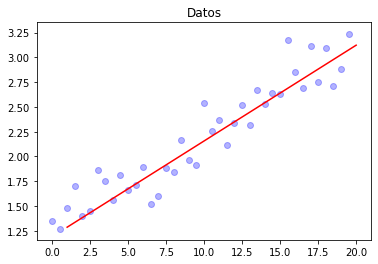

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression

def f(x):
    np.random.seed(42)
    y=0.1*x +1.25 + 0.2*np.random.randn(x.shape[0])
    return y

x =np.arange(0,20,0.5)
y = f(x)
print(x)
print(y)
plt.scatter(x,y, label='data',alpha=0.3, color='blue')
plt.title('Datos')
x=np.array([np.ones(40),x]).T
B = np.linalg.inv(x.T @ x)@ x.T @ y
print(B)
plt.plot([1,20],[B[0]+B[1] * 0 , B[0] + B[1]*20 ],c="red")

## Entrenando un modelo de Regresión Lineal en python

In [47]:
x.shape
print(B)

[1.28587925 0.09183522]


Text(0.5, 1.0, 'Datos')

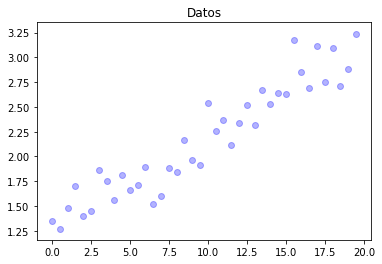

In [43]:
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression

def f(x):
    np.random.seed(42)
    y=0.1*x +1.25 + 0.2*np.random.randn(x.shape[0])
    return y

x =np.arange(0,20,0.5)
y = f(x)
plt.scatter(x,y, label='data',alpha=0.3, color='blue')
plt.title('Datos')


In [44]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression 
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
regresion_lineal.fit(x.reshape(-1,1), y) 
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))
# resultado: w = [0.09183522], b = 1.2858792525736682

w = [0.09183522], b = 1.2858792525736682


In [45]:
# vamos a predicir y = regresion_lineal(5)
nuevo_x = np.array([5]) 
prediccion = regresion_lineal.predict(nuevo_x.reshape(-1,1))
print(prediccion)

[1.74505534]


In [46]:
# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 0.03318522012927899
Raíz del Error Cuadrático Medio (RMSE) = 0.18216810952875093


In [48]:
r2 = regresion_lineal.score(x.reshape(-1,1), y)
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = 0.8943593637683118
